<a href="https://colab.research.google.com/github/ashishar/qbook/blob/master/MLE_principle_gaussian_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
# True parameters
mu_true = 1
sigma_true = 1

# Generate random data
np.random.seed(0)
data = np.random.normal(mu_true, sigma_true, 100)

In [ ]:
initial_guess = [0.5, 0.1] #Initial ansatz for mu and sigma

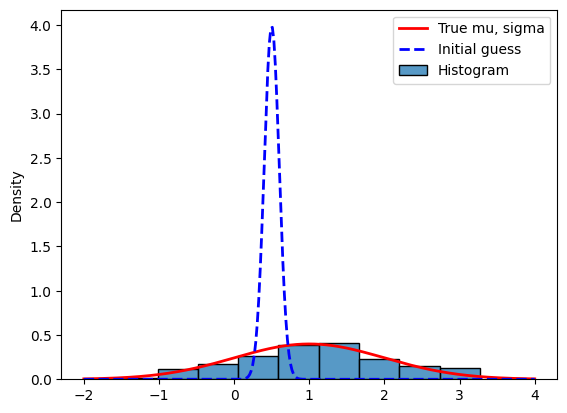

In [ ]:
sns.histplot(data, kde=False, stat="density", label='Histogram')
x = np.linspace(-2, 4, 300)
plt.plot(x, norm.pdf(x, mu_true, sigma_true), 'r-', lw=2, label='True mu, sigma')
plt.plot(x, norm.pdf(x, initial_guess[0], initial_guess[1]), 'b--', lw=2, label='Initial guess')
plt.legend()
plt.show()

In [ ]:
from scipy.optimize import minimize

def neg_log_likelihood(params):
    mu, sigma = params
    return -np.sum(np.log(norm.pdf(data, mu, sigma)))

result = minimize(neg_log_likelihood, initial_guess, bounds=[(-1, 1), (0.1, 2)])
mle_mu, mle_sigma = result.x

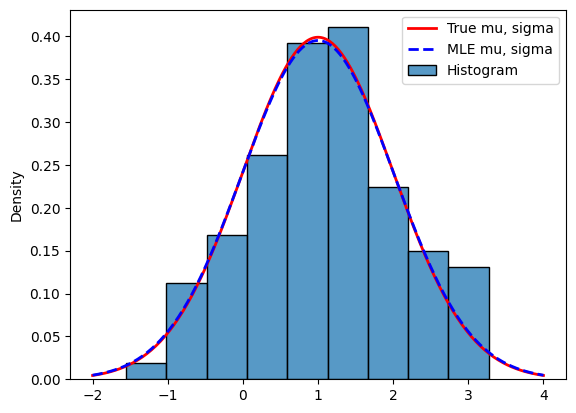

In [ ]:
sns.histplot(data, kde=False, stat="density", label='Histogram')
x = np.linspace(-2, 4, 300)
plt.plot(x, norm.pdf(x, mu_true, sigma_true), 'r-', lw=2, label='True mu, sigma')
plt.plot(x, norm.pdf(x, mle_mu, mle_sigma), 'b--', lw=2, label='MLE mu, sigma')
plt.legend()
plt.show()